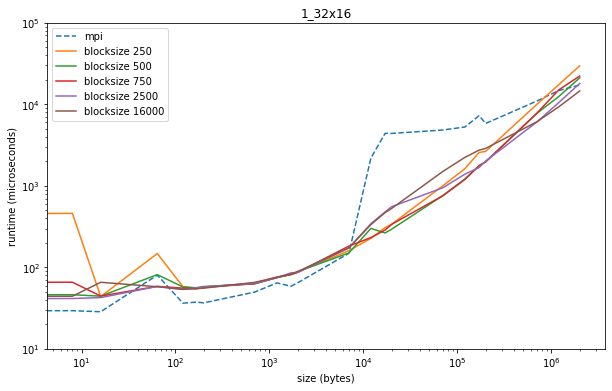

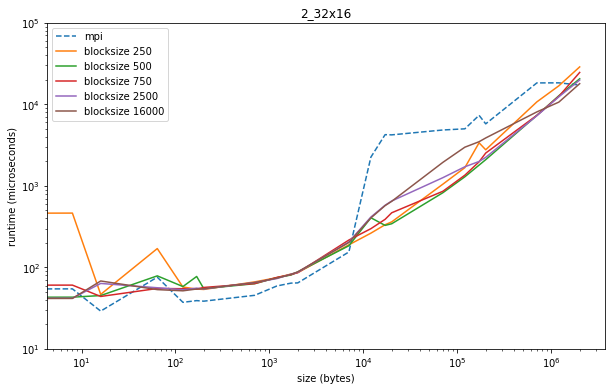

In [87]:
import pandas as pd
from matplotlib import pyplot as plt

args = {
  'xlabel':  'size (bytes)',
  'ylabel':  'runtime (microseconds)', 
  'loglog':  True,
  'figsize': (10,6),
  'ylim':    (10, 100000)
}

def create_plot(log):
  df = pd.read_csv(f"./logs/{log}.log", sep=';')
  per_blocksize = df.groupby(df.blocksize)
  df['size'] = 8*df['size']
  df['mpi'] = 1000*df['mpi']
  df['custom'] = 1000*df['custom']
  ax = None
  for group in per_blocksize.groups:
    if ax == None:
      ax = per_blocksize.get_group(group).plot(x='size', y='mpi', label='mpi', style='--', **args)
      # ax = per_blocksize.get_group(group).plot(x='size', y='allreduce', label='allreduce', style='--', **args)
      # per_blocksize.get_group(group).plot(x='size', y='reduce+bcast', label='reduce+bcast', style='--', ax=ax, **args)
    per_blocksize.get_group(group).plot(x='size', y='custom', title=log, ax=ax, label=f'blocksize {group}', **args)

create_plot('1_32x16')
create_plot('2_32x16')
# create_plot('test1')
# create_plot('test2')